# Natural Language Processing

## Basic NLP

```python
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

# EDA: WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wc = WordCloud(background_color="white",colormap="Dark2",max_font_size=100,stopwords=sw,max_words=200)
wc.generate(my_text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# we can also use stemming

# turning each document in corpus into the bag of words format
from sklearn.feature_extraction.text import CountVectorizer
bow= CountVectorizer(stop_words=stopwords.words('english'))
bow.fit(X_train)
bow_transformed= bow.transform(X_train)

# dict of words and their index
bow.vocabulary_

# simple visualization of bow dataframe
pd.DataFrame(bow_transformed.toarray(),columns=bow.get_feature_names()).head()

# sparsity of the sparse matrix
bow_transformed.shape
bow_transformed.nnz #non-zero counts
sparsity = 1-(bow_transformed.nnz / (bow_transformed.shape[0] * bow_transformed.shape[1]))

# implementing tfidf
from sklearn.feature_extraction.text import TfidfTransformer
tfidf= TfidfTransformer().fit(bow_transformed)
tfidf_transformed= tfidf.transform(bow_transformed)

# ready to apply a model
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()
mnb.fit(tfidf_transformed,y_train)
y_hat= mnb.predict(tfidf.transform(bow.transform(X_test)))

```

## Create a pipeline
```python
from sklearn.pipeline import Pipeline
pipeline= Pipeline([('bow', CountVectorizer(stop_words=stopwords.words('english'))),
                    ('tfidf', TfidfTransformer()),
                    ('mnb', MultinomialNB()) ])

pipeline.fit(X_train,y_train)
y_hat= pipeline.predict(X_test)
```

## Sentiment Analysis
**TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.

**Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.



```python
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['msg'].apply(pol)
df['subjectivity'] = df['msg'].apply(sub)
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import nltk
from nltk.corpus import stopwords

In [3]:
len(stopwords.words('english'))

179

In [4]:
cd

/home/siavash


In [5]:
df= pd.read_csv('PythonBootcampDataScience/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection',
                sep='\t',names=['target','msg'])

In [6]:
df.head()

,target,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from wordcloud import WordCloud,STOPWORDS

In [24]:
sw= list(STOPWORDS)+list(stopwords.words('english'))+['It','gt','go','ok','got','ur','lt']


In [8]:
my_str=''
for i in df['msg']:
    my_str += i

(-0.5, 399.5, 199.5, -0.5)

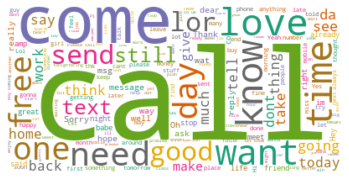

In [25]:
wc = WordCloud(background_color="white",
               colormap="Dark2", 
               max_font_size=150,
               max_words=200,
               stopwords=sw)
wc.generate(my_str)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['msg'], df['target'], test_size=0.33, random_state=42)

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
bow= CountVectorizer(stop_words=stopwords.words('english'))

In [171]:
bow.fit(X_train)
bow_transformed= bow.transform(X_train)

In [172]:
pd.DataFrame(bow_transformed.toarray(),columns=bow.get_feature_names()).head()

,00,000,000pes,0089,0121,01223585236,01223585334,02,0207,02072069400,...,zealand,zebra,zed,zeros,zhong,zoe,zogtorius,zoom,zouk,èn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
sparsity = 1-(bow_transformed.nnz / (bow_transformed.shape[0] * bow_transformed.shape[1]))
sparsity

0.9987672535435436

In [174]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf= TfidfTransformer()
tfidf.fit(bow_transformed)
tfidf_transformed= tfidf.transform(bow_transformed)

In [175]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()
mnb.fit(tfidf_transformed,y_train)
y_hat= mnb.predict(tfidf.transform(bow.transform(X_test)))

In [176]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_hat),'\n',
      confusion_matrix(y_test,y_hat),'\n',
      classification_report(y_test,y_hat))

0.9733550842849374 
 [[1593    0]
 [  49  197]] 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1593
        spam       1.00      0.80      0.89       246

    accuracy                           0.97      1839
   macro avg       0.99      0.90      0.94      1839
weighted avg       0.97      0.97      0.97      1839



In [177]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(tfidf_transformed,y_train)
y_hat= rfc.predict(tfidf.transform(bow.transform(X_test)))

In [178]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_hat),'\n',
      confusion_matrix(y_test,y_hat),'\n',
      classification_report(y_test,y_hat))

0.9804241435562806 
 [[1593    0]
 [  36  210]] 
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1593
        spam       1.00      0.85      0.92       246

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.95      1839
weighted avg       0.98      0.98      0.98      1839



In [179]:
from sklearn.pipeline import Pipeline

In [184]:
pipeline= Pipeline([ ('bow', CountVectorizer(stop_words=stopwords.words('english'))),
                    ('tfidf', TfidfTransformer()),
                    ('mnb', MultinomialNB()) ])

In [185]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "...
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                         

In [186]:
y_hat= pipeline.predict(X_test)

In [187]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_hat),'\n',
      confusion_matrix(y_test,y_hat),'\n',
      classification_report(y_test,y_hat))

0.9733550842849374 
 [[1593    0]
 [  49  197]] 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1593
        spam       1.00      0.80      0.89       246

    accuracy                           0.97      1839
   macro avg       0.99      0.90      0.94      1839
weighted avg       0.97      0.97      0.97      1839



In [189]:
from textblob import TextBlob

In [192]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['msg'].apply(pol)
df['subjectivity'] = df['msg'].apply(sub)

In [193]:
df.head()

,target,msg,polarity,subjectivity
0,ham,"Go until jurong point, crazy.. Available only ...",0.15,0.7625
1,ham,Ok lar... Joking wif u oni...,0.50,0.5000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.30,0.5500
3,ham,U dun say so early hor... U c already then say...,0.10,0.3000
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.00,0.0000


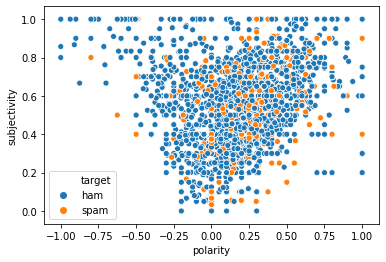

In [200]:
sns.scatterplot(x='polarity',y='subjectivity',hue='target',data=df)

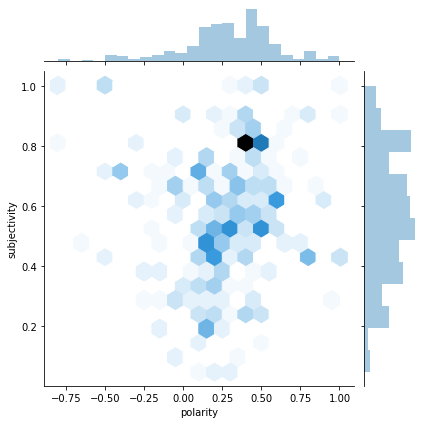

In [230]:
sns.jointplot(x='polarity',y='subjectivity',kind='hex',
              data=df[(df['target']=='spam') & (df['subjectivity']!=0) & (df['polarity']!=0)])

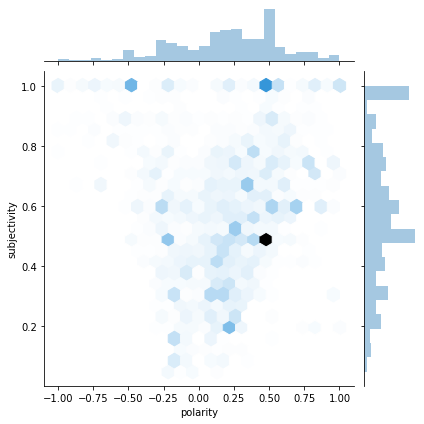

In [228]:
sns.jointplot(x='polarity',y='subjectivity',kind='hex',
              data=df[(df['target']=='ham') & (df['subjectivity']!=0) & (df['polarity']!=0)])